In [ ]:
from wizard.atoms import SymbolInfo
from wizard.calculator import MaterialCalculator
from calorine.calculators import CPUNEP
from ase.calculators.lammpslib import LAMMPSlib

data = {'DFT':{}, 'NEP':{}}

symbol_infos = [
SymbolInfo('Ag', 'fcc', 4.146),
SymbolInfo('Al', 'fcc', 4.042),
SymbolInfo('Au', 'fcc', 4.159),
SymbolInfo('Cu', 'fcc', 3.631),
SymbolInfo('Ni', 'fcc', 3.509),
SymbolInfo('Pb', 'fcc', 5.038),
SymbolInfo('Pd', 'fcc', 3.939),
SymbolInfo('Pt', 'fcc', 3.967),
SymbolInfo('Cr', 'bcc', 2.845),
SymbolInfo('Mo', 'bcc', 3.164),
SymbolInfo('Ta', 'bcc', 3.319),
SymbolInfo('V',  'bcc', 2.997),
SymbolInfo('W',  'bcc', 3.185),
SymbolInfo('Mg', 'hcp', 3.195, 5.186),
SymbolInfo('Ti', 'hcp', 2.931, 4.651),
SymbolInfo('Zr', 'hcp', 3.240, 5.157)
]

for symbol_info in symbol_infos:
    atoms = symbol_info.create_bulk_atoms((3,4,5))
    calc = CPUNEP('../potentials/4-4-80/nep.txt')
    material_calculator = MaterialCalculator(atoms, calc, symbol_info)
    e = material_calculator.formation_energy_vacancy()
    data['NEP'][symbol_info.formula] = e

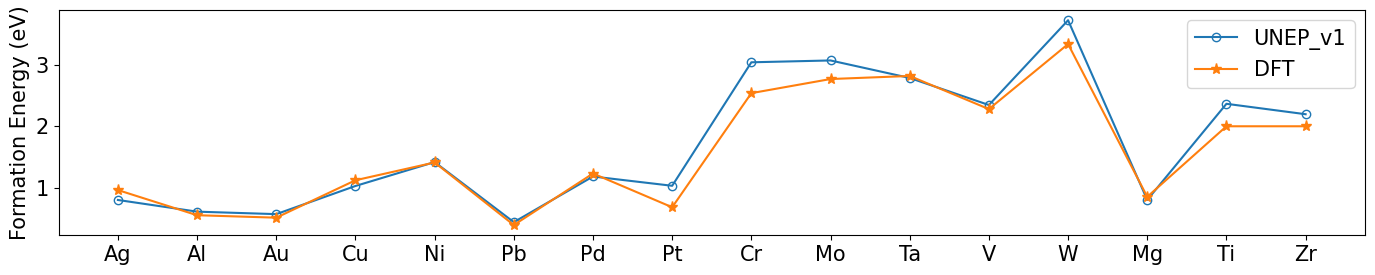

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

symbols = ['Ag', 'Al', 'Au', 'Cu', 'Ni', 'Pb', 'Pd', 'Pt', 'Cr', 'Mo', 'Ta', 'V', 'W', 'Mg', 'Ti', 'Zr']

data['DFT'] = {"Ag": 0.96, "Al": 0.55, "Au": 0.51, "Cu": 1.12, "Ni": 1.41, "Pb": 0.39, "Pd": 1.23, "Pt": 0.68, "Cr": 2.54, "Mo": 2.77, "Ta": 2.82, "V": 2.28, "W": 3.34, "Mg": 0.85, "Ti": 2.00, "Zr": 2.00}
fig, ax = plt.subplots(figsize=(14, 3))  
plt.rcParams.update({'font.size': 15})

ax.plot(symbols, [data['NEP'][symbol] for symbol in symbols], marker='o', label='UNEP_v1', fillstyle='none')
ax.plot(symbols, [data['DFT'][symbol] for symbol in symbols], marker='*', label='DFT', markersize=8)
ax.set_ylabel('Formation Energy (eV)', fontsize = 15)

plt.xticks(fontsize = 15)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.legend()
plt.savefig('mono_vacancy.png')